# Monte Carlo Methods and Minimization

## Library Imports Go Here

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import csv
import mpmath

## Integration via Monte Carlo

### The Function

<font color = blue>
    
Construct a function that implements the Monte Carlo method of integration.  It should take as inputs the function `function`, the upper and lower limits of integration `x_initial` and `x_final`, the number of `darts` to be thrown, and the height of the box `height`.

In [93]:
def monte_carlo(function, x_initial, x_final, darts, height):
    """
    function that evaluates a definite integral using the monte carle method
    function : the function that will be the integrand of the integral
    x_initial : lower bound of the integral
    x_final : upper bound of the integral
    darts : the number of "darts" we are throwing
    height : the height of the box which we are using to integrate the function
    returns : the answer to the definite integral
    """
    area_of_box = (x_final - x_initial) * height
    darts_under_curve = 0
    for i in range(darts):
        dart_x = random.uniform(x_initial, x_final)
        dart_y = random.uniform(0, height)
        if dart_y <= function(dart_x):
            darts_under_curve += 1
    return (darts_under_curve / darts) * area_of_box
    

### Testing the Function

<font color = blue>
We will be testing the code on the function

$$
f(x) = \frac{x^2}{2}
$$

that we have now used several times, integrating over the familiar range $[-1, 3]$.

Begin by plotting the function over the integration region, and determining what an appropriate choice of `height` should be.

Now, because of the use of random numbers, the result of a Monte Carlo method calculation will vary slightly each time it's run.  Create an array of 10 separate outputs for the function, with N = 100.  Then repeat this with N = 1000, N = 10000, N = 100000, and N = 1000000.  (You may want to estimate how long this last one will take before executing it.)

**Discuss** your results.

In [96]:
def test_function(x):
    """
    function we are using to test the monte carlo integration method (x^2/2)
    x : variable
    returns : f(x)
    """
    return x**2 / 2

print(monte_carlo(test_function, -1, 3, 100, 5))
print(monte_carlo(test_function, -1, 3, 1000, 5))
print(monte_carlo(test_function, -1, 3, 10000, 5))
print(monte_carlo(test_function, -1, 3, 100000, 5))
print(monte_carlo(test_function, -1, 3, 1000000, 5))

2.6
4.84
4.584
4.666
4.67992


In these results, we can see that the computed values of the definite integrals are worse in terms of x than any of the method we used last week, however, even when using n = 1000000 the runtime is still muich more reasonable than the runtime of the same n value integral from last week. I also notice that upon each time I run the code above, I get different solutions to the integral because of course the darts are randomly thrown.

## Basic Rutherford Scattering

<font color = blue>
In Rutherford scattering (non-dimensionalized) we assume we begin with a uniform beam of particles of total radius $B$, all at the same speed $v_0 = 1$.  Each particle in the beam can be described by its impact parameter $b$, which determines at what angle $\Theta$ it will strike the detector:

$$
b = \cot\frac{\Theta}{2}, \hspace{.5in} \Theta = 2\cot^{-1} b
$$

The full beam will generate a distribution of strikes that *should* follow the pattern

$$
N(\Theta) \, d\Theta = \frac{N}{B^2} \frac{\cos\frac{\Theta}{2}}{\sin^3\frac{\Theta}{2}} \, d\Theta = \mbox{number of strikes in the range $[\Theta, \Theta + d\Theta]$}
$$

### The Incoming Beam

<font color = blue>
    
Create a function that generates a simulation of a uniform beam of particles, with two inputs: the radious of the beam and the total number of particles in the beam.  The output should be an array of impact parameters.  Test your module by creating a histogram of the impact parameters of 100000 particles, where the beam radius is $B = 1$.  (The command `hist` in `matplotlib.pyplot` is what you're looking for.)

As a **discussion**, make a detailed, quantitative argument for what the shape of the histogram *should* be, and compare this with the histogram you obtained.  This argument should incorporate the effects of the "bin size" as well as the total number of particles.  

Hint: consider a thin annulus inside the beam of particles, with some inner radius $r$ and some width $w$.  How many particles do you expect to pass through it?

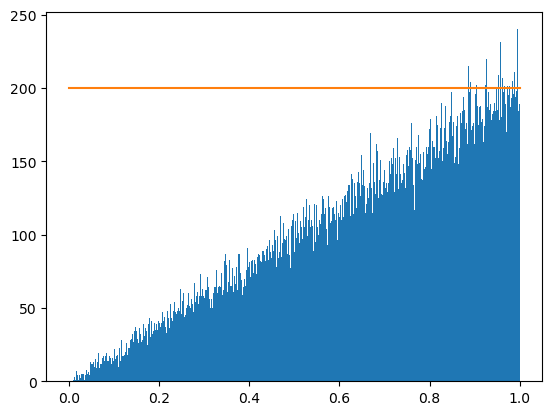

In [262]:
def sim_uniform_impact_params(radius, n):
    """
    function that generates a simulation of a uniform beam of particles
    radius : the radius of the beam
    n : the total number of particles in the beam
    returns : an array of impact paramters with each value corresponding to the impact parameter of a particle in the beam
    """
    simulated_beam_max = radius
    simulated_beam_min = -radius
    dart_x = -radius * 2 # temporary dart throw so that we enter the while loop below
    dart_y = -radius * 2
    impact_params = np.zeros(n)
    for i in range(n):
        while np.sqrt(dart_x**2 + dart_y**2) > radius:
            dart_x = random.uniform(0, radius)
            dart_y = random.uniform(0, radius)
        impact_params[i] = np.sqrt(dart_x**2 + dart_y**2)
        dart_x = radius + 1
        dart_y = radius + 1
    return impact_params

def fitted_hist(N, B, b, w):
    return ((N)/(np.pi * B**2)) * ((2 * np.pi * b) - (2 * np.pi * w))

b = np.linspace(0, 1, 1000)
w = np.linspace(-.001, .999, 1000)

impact_params = sim_uniform_impact_params(1, 100000)
_ = plt.hist(impact_params, bins=1000)
plt.plot(b, fitted_hist(100000, 1, b, w))

The shape of the histogram should be linear as we can see the histogram is. The theoretical shape that I believe the histogram should have follows the equation: $\frac{N}{\pi B^2} * 2\pi b db$ where B = 1 (in this case) and b is the distance of a given particle from the center of the beam. Obviously as we can see by the wierd line in the histogram, this equation heavily depends on the size of db, which when analytically observed, we can tell should be linear. This allows us to confirm that this histogram makes sense.

### * The Outgoing Distribution

<font color = blue>
    
Now create a function that uses the previous function to generate a list of final angles from a simulated Rutherford experiment.  This function should take the same inputs as the previous function: the radius of the incoming beam and the total number of particles.  Test the function with 100000 incoming particles and an incoming beam radius of $B = 10$, and (as a **discussion**) compare the shape of the histogram with the theoretical shape, including the minimum angle of scattering, and taking into account bin size and total number of particles.  Include in your final plot both the histogram and the theoretical curve.  (Don't forget to include in your **discussion** a conversation about the physics!)

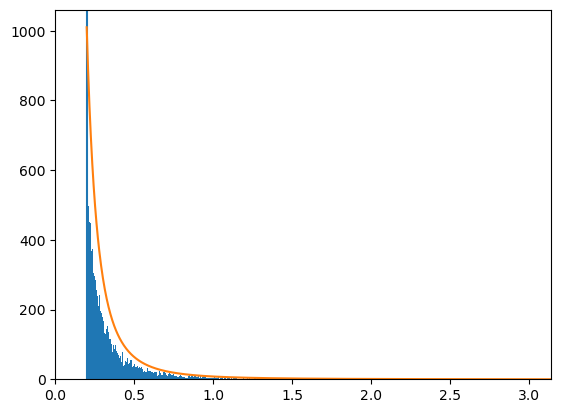

In [434]:
def sim_uniform_angles(radius, n):
    """
    function that generates a a list of final angles from a simulated rutherford experiment
    radius : the radius of the beam
    n : the total number of particles in the beam
    returns : an array of angles corresponding to the final angles after a simulated rutherford experiment
    """
    impact_params = sim_uniform_impact_params(radius, n)
    final_angles = np.zeros(n)
    for i in range(n):
        final_angles[i] = 2 * mpmath.acot(impact_params[i])
    return final_angles

def theoretical_curve(theta):
    N = 100000
    B = 10
    return ((np.cos(theta/2))/(np.sin(theta/2))**3)

theta_min = float(2 * mpmath.acot(10))
theta = np.linspace(theta_min, np.pi, 1000)
final_angles = sim_uniform_angles(10, 100000)
plt.xlim(0, np.pi)
plt.axvline(theta_min)
plt.hist(final_angles, bins=5000)
plt.plot(theta, theoretical_curve(theta))

In this graph we can see that the theoretical line is a slight overestimation when compared to the simulated theoretical angles however this makes sense to me due to the fact that we are simulating all of the data and therefore, there will be more of a bias towards the lower impact parameters leading me to believe that an underestimation should occur.

### Discussion

### Discussion here

## Incoming Speed Modification

<font color = blue>
Now we want to modify the "beam" so that the particles in it have a range of speeds (non-dimensionalized) following the Gaussian distribution

$$
\mathcal{P}(v) \, dv = \frac{1}{\sigma\sqrt{\pi}} \, e^{-\frac{(v - 1)^2}{\sigma^2}} \, dv
$$

and examine what effect this has on the final distribution of angles.

### Gaussian Distribution of Speeds

<font color = blue>
    
Create a function to generate a set of incoming speeds that follow a Gaussian distribution.  Your function should take two inputs: the total number of speeds you want to generate, and the width $\sigma$ of the distribution.  It should also never allow a speed to be generated that is less than zero.  Test your function by generating a list of 100000 particle speeds, using $\sigma = .1$.  Plot the results as a histogram, and confirm that the shape is correct (using the same process you followed for the previous two histograms).

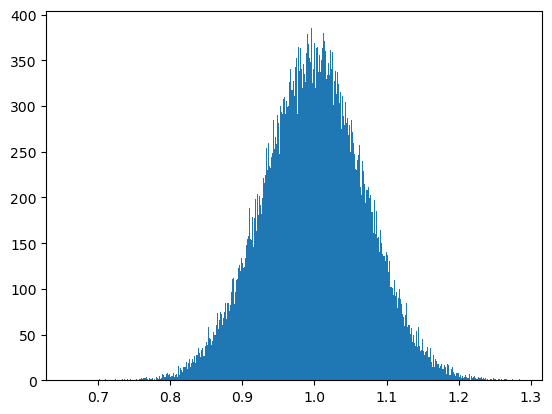

In [112]:
def generate_speeds(datapoints, sigma):
    """
    generates a set of incoming speeds that follow a gaussian distribution
    datapoints : the number of speeds we want to generate
    sigma : the width of the distribution
    """
    v_o = 0
    v_f = 2
    incoming_speeds = np.zeros(datapoints)
    for i in range(datapoints):
        v = random.uniform(0, 2)
        Pv = random.uniform(0, 5.6419)
        while Pv > (1 / (sigma * np.sqrt(np.pi))) * np.exp(- ((v - 1)**2)/(sigma**2)):
            v = random.uniform(0, 2)
            Pv = random.uniform(0, 5.6419)
        incoming_speeds[i] = v
    return incoming_speeds
    
incoming_speeds = generate_speeds(100000, .1)
_ = plt.hist(incoming_speeds, bins=1000)

I can confirm that this shape makes sense because I can directly compare it to the graph of P(v) which has the same maximum around x = 1. plotting that function next to the graph also gives even further comfirmation that this histogram makes sense.

### Discussion

### * Modifed Rutherford Distribution

<font color = blue>
    
Create a function that uses the previous functions for generating impact parameters and speeds to generate a list of final angles.  Test it out using 100000 particles, with a beam radius of 10 and $\sigma = 0.1$.  Show the resulting histogram together with the histogram where we assume all particles have the same speed.  Don't forget to **discuss** your results!

<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:12: SyntaxWarning: invalid escape sequence '\T'
<>:13: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:17: SyntaxWarning: invalid escape sequence '\T'
<>:18: SyntaxWarning: invalid escape sequence '\T'
<>:11: SyntaxWarning: invalid escape sequence '\T'
<>:12: SyntaxWarning: invalid escape sequence '\T'
<>:13: SyntaxWarning: invalid escape sequence '\T'
<>:16: SyntaxWarning: invalid escape sequence '\T'
<>:17: SyntaxWarning: invalid escape sequence '\T'
<>:18: SyntaxWarning: invalid escape sequence '\T'
/var/folders/xj/m3v1xx6n4rl7kwn57frntw_r0000gn/T/ipykernel_53687/4080826917.py:11: SyntaxWarning: invalid escape sequence '\T'
  plt.title("$N(\Theta)$ vs $\Theta$ for probablistic speeds")
/var/folders/xj/m3v1xx6n4rl7kwn57frntw_r0000gn/T/ipykernel_53687/4080826917.py:12: SyntaxWarning: invalid escape sequence '\T'
  plt.xlabel("$\Theta$")
/var/folders/xj/m3v1xx6n4rl7kwn57frntw_r0000gn

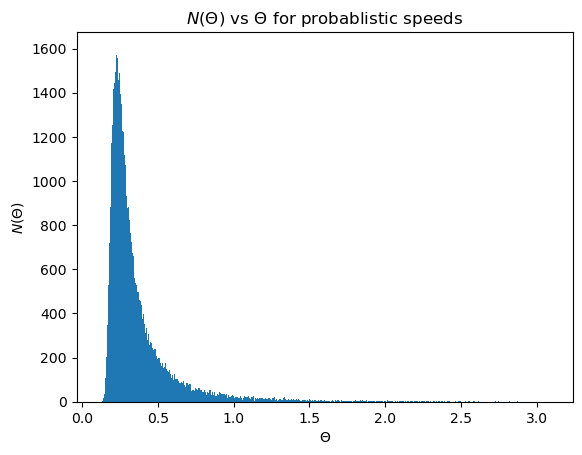

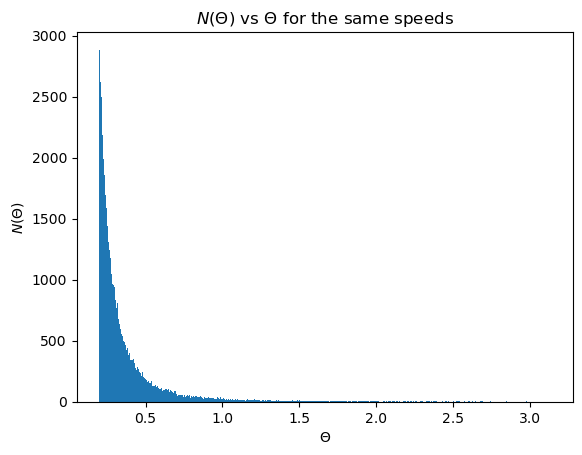

In [255]:
n = 100000
b_values = sim_uniform_impact_params(10, n)
v_values = generate_speeds(n, .1)
final_angles = np.zeros(n)

for i in range(n):
    final_angles[i] = 2 * mpmath.acot(b_values[i] * v_values[i]**2)

same_speed_final_angles = sim_uniform_angles(10, 100000)

plt.title("$N(\Theta)$ vs $\Theta$ for probablistic speeds")
plt.xlabel("$\Theta$")
plt.ylabel("$N(\Theta)$")
_ = plt.hist(final_angles, bins=1000)
plt.show()
plt.title("$N(\Theta)$ vs $\Theta$ for the same speeds")
plt.xlabel("$\Theta$")
plt.ylabel("$N(\Theta)$")
_ = plt.hist(same_speed_final_angles, bins=1000, label="same speed")
plt.show()

Comparing the two graphs of N(theta) vs theta for the same speeds and different speeds we see a handful of theoretical and visual differences. Firstly, visually, with these two graphs we can see that for larger values of theta, there are more particles present when there are different speeds than the same speeds. This happens because we can get random particles that are going much faster or slower than the rest causing there to be outliers more often than in the graph of the particles with the same speed. We can also see that the graph generally becomes more muddied when there are generated speeds. Theoretically, we know that this makes sense because when theta approaches theta_min, we know that in the graph of the particles with the same speed, we have an asymptote as theta goes to zero whereas in the graph of the particles with different speeds there is no asymptote, causing the maximum to be less extreme.

## Minimization Functions

### Fixed Number of Steps of Fixed Width

#### Stepping Code

<font color = blue>
    
Begin by writing a function which takes as inputs a function `function`, an initial value `x_initial`, the number of steps to be taken `step_count`, a small parameter `epsilon` (for use in the numerical derivative) and another small parameter `step` (the fixed step size).  Your function should output an array of `step_count` values of the function as it is moved towards its minimum. 

In [119]:
def fixed_steps(function, x_initial, step_count, epsilon, step):
    """
    Minimization algorithm that uses a fixed number of steps
    function : the function who we are trying to minimize
    x_initial : the initial value for the function
    step_count : the number of steps to be taken
    epsilon : constant used to compute the numerical derivative
    step : the size of each step we are taking to find the minimum
    
    returns : an array of size step_count of values of the function as it moves towards the minimum
    """
    x_ith_step = x_initial
    step_values = np.zeros(step_count)
    for i in range(step_count):
        derivative = (function(x_ith_step + epsilon) - function(x_ith_step)) / epsilon
        sign = derivative / abs(derivative)
        x_ith_step = x_ith_step - (step * sign)
        step_values[i] = function(x_ith_step)
    return step_values

#### Testing

<font color = blue>
    
We want to test this code on the function 
    $$F(x) = \frac{1}{x^2} - \frac{10}{x}e^{-x}$$
 Create the function, and plot it.  Use the plot to choose a good initial value `x_initial`.
 

Then, run your function using `epsilon` = $10^{-6}$, and a step size of $10^{-4}$, for a value of `step_count` you choose. 

Plot the results (you want to plot "$k$" vs. "$\mathrm{function}(x_k)$").  Adjust your value of `step_count` until it is optimal: your graph should more-or-less monatonically decrease until it reaches some value, and then essentially stay there.  You will want to make sure `step_count` is large enough that the function has "bottomed out", but not unnecessarily large.

Then, create second graph in which you "zoom in" on the later data points, so that you can see the results "rattling" around near the bottom of the potential.

**Discuss** the processes you went through and the results.

(-20.0, 5.0)

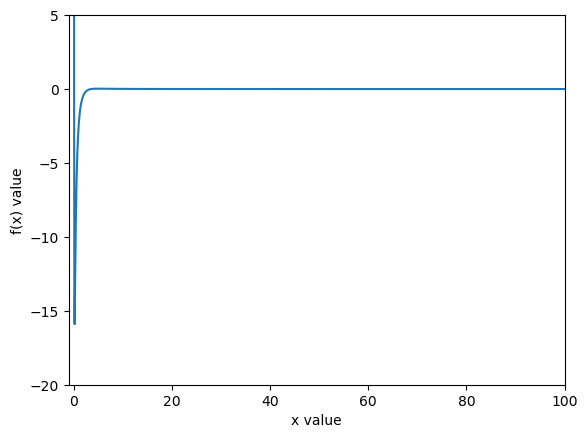

In [122]:
def test(x):
    """
    function that we are using to test our fixed_steps function
    x : variable

    returns : f(x)
    """
    return (1/(x**2)) - ((10/x) * np.exp(-x))

x_vals = np.linspace(-1, 100, 2000)
y_vals = test(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel("x value")
plt.ylabel("f(x) value")
plt.xlim(-1, 100)
plt.ylim(-20, 5)

In order to properly display what we were trying to see in this graph, I messed with the x and y limits until I saw some interesting minimum. Once I observed this minimum I then changed the limits again in order to highlight what was happening at that minimum.

In [124]:
function_x_k = fixed_steps(test, .112, 10**4, 10**-6, 10**-4)

-15.944473763336685

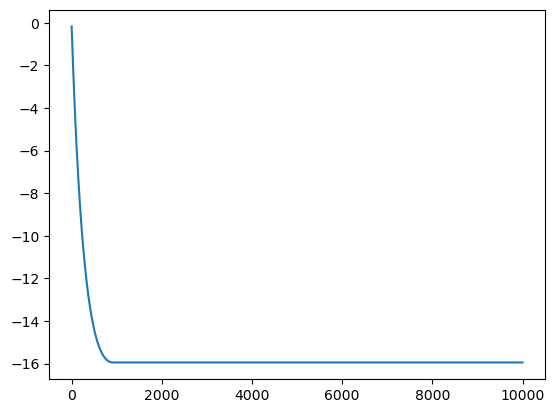

In [125]:
# plot k vs function(x_k) where k is the number of steps
k = np.linspace(0, 10**4, 10**4)
plt.plot(k, function_x_k)
function_x_k[-1]

In order to create a correct graph of k verses f(x_k) I first used a very low number of steps (k) with what I thought was the correct x_initial point that I found from the graph in the previous cell. Once the graph looked somewhat reasonable I went even further to get a more accurate x_initial point and I increased the number of steps. I then changed the steps until the dropoff happened at some reasonable location on the x axis of the graph (not to close to zero).

(-15.9444, -15.9445)

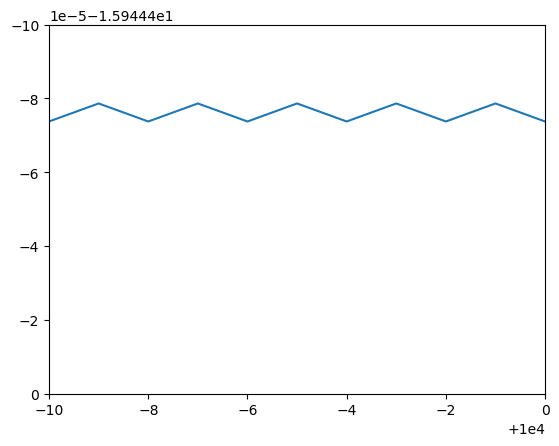

In [127]:
plt.plot(k, function_x_k)
plt.xlim(9990, 10000)
plt.ylim(-15.9444, -15.9445)

In order to produce this graph, I used a large number of steps with my fixed_steps function, and founf the last item in the outputted array. Based on that value, I changed the y limits so that that point would be somewhere in between the upper and lower bounds. Then, I chose x limits so that only tens of values would be shown. This process led me to the graph above where we can see the rattling at the end of the approximation.

### With Adaptive Stepping

#### Steppping Code

<font color = blue>
    
Now write a new version of the function which implements adaptive stepping, with a tolerance value used as the exit condition.  This time your code should take as inputs the tolerance parameter `step_min` (instead of the number of steps), the initial step size `step_initial` (instead of the fixed step size), and two parameters `modify_plus` and `modify_minus`, which we will use to modify the step size after each step.  (It should also still take the function  and the parameter $\epsilon$ associated with the numerical derivative as inputs).  In addition, modify the output of the function so it also includes an array of step sizes.

You may want to do this in two stages:  first, keep the number of steps fixed and just put in the adaptation of step size.  Test the code to make sure it's working.  Then, make the modification to use the tolerance minimum step size as your exit condition.

In [132]:
def adaptive_steps(function, x_initial, step_min, epsilon, step_initial, modify_plus, modify_minus):
    """
    Minimization algorithm that uses an adaptive number of steps to find the minimum
    function : the function who we are trying to minimize
    x_initial : the initial value for the function
    step_min : the minimum size of a step we want to take (tolerance parameter)
    epsilon : constant used to compute the numerical derivative
    step_initial : The initial size of a step
    modify_plus : the multiplier for the step size when we went in the right direction (towards the min)
    modify_minus : the multiplier for the step size when we went in the wrong direction (away from the min)
    
    returns : an array of values of the function as it moves towards the minimum
    """
    x_nth_step = x_initial
    step_size = step_initial
    adaptive_step_values = np.array([])
    step_sizes = np.array([])
    while step_size > step_min:
        derivative = (function(x_nth_step + epsilon) - function(x_nth_step)) / epsilon
        old_f_x = function(x_nth_step)
        x_nth_step = x_nth_step - (step_size * (derivative / abs(derivative)))
        step_sizes = np.append(step_sizes, step_size)
        adaptive_step_values = np.append(adaptive_step_values, function(x_nth_step))
        if old_f_x > function(x_nth_step):
            step_size = modify_plus * step_size
        else:
            step_size = modify_minus * step_size
    return step_sizes, adaptive_step_values

#### Testing

<font color = blue>
    
Test your new function with the same function F(x) as before.  Use the values `modify_plus` = 1.1 and `modify_minus` = 0.5 for your multiplication factors, along with `epsilon` = $10^{-6}$ for the numerical derivative and an initial step size of `step_initial` = $10^{-4}$.  Set your tolerance minimum step size to be `step_min` = $10^{-6}$.  

Again, plot your result as $k$ vs. $F(x_k)$, and then plot a "zoomed in" version that examines the last portion of the stepping process.

Then, create a third plot, which shows the step size as a function of $k$.

**Discuss** what you see in this analysis thoroughly.

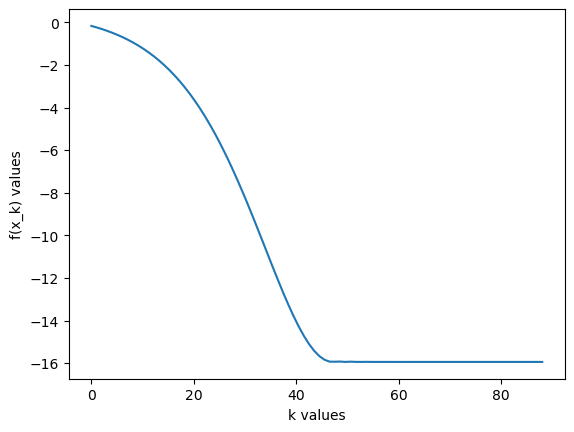

In [135]:
step_sizes, adaptive_step_values = adaptive_steps(test, .112, 10**-6, 10**-6, 10**-4, 1.1, .5)
k = np.linspace(0, len(adaptive_step_values), len(adaptive_step_values))
plt.xlabel("k values")
plt.ylabel("f(x_k) values")
plt.plot(k, adaptive_step_values)

In this graph, I can see that the shape of the path down to a somewhat precise value of the function is very different than the shape of the previous k vs $f(x_k)$. Despite this difference in shape, it is key to observe how much quicker this graph got to a precise value of $f(x_k)$. This efficiency is due to the fact that the step size increases, the longer it takes to get to the minimum (or close to it).

plt.xlabel("k values")
plt.ylabel("f(x_k) values")
plt.ylim(-15.9444, -15.9445)
plt.xlim(60, len(k))
plt.plot(k, adaptive_step_values)

In this graph, again we can see the difference between the adaptive step method and the fixed step method. We can see in this graph that the size of each jump changes drastically which is different than the rattling we saw in the previous graph that was zoomed in. We can also see that as k increases, our $f(x_k)$ gets more and more precise until it has gotten close enough (as defined by the user) to the desired minimum.

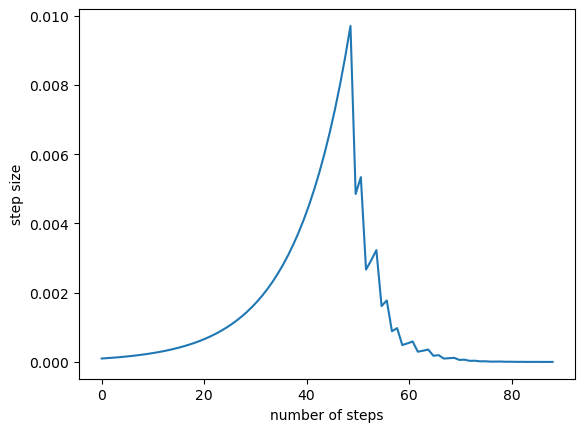

In [139]:
plt.xlabel("number of steps")
plt.ylabel("step size")
plt.plot(k, step_sizes)

In this graph I can see that the step sizes steadily increase until we have overshot the point of the minimum. Once this overshooting has happened, we then see the step size consistently decrease until we have pinpointed exactly where the minimum is (within our defined tolerance)

#### A Cleaner Version

<font color = blue>
    
The reason we built and output the arrays of values in the previous two algorithms was so that we could examine and better understand the differences between those algorithms.  But now that we have done that, it is better to dispense with these.

Create a more stream-lined version of the adaptive stepping function in which these arrays are never created.  Have this new version output just the final location $x_k$ (the best estimate of the location of the minimum).

Don't forget to make sure you are still getting correct results!

In [143]:
def adaptive_steps_V2(function, x_initial, step_min, epsilon, step_initial, modify_plus, modify_minus):
    """
    Minimization algorithm that uses an adaptive number of steps to find the minimum
    function : the function who we are trying to minimize
    x_initial : the initial value for the function
    step_min : the minimum size of a step we want to take (tolerance parameter)
    epsilon : constant used to compute the numerical derivative
    step_initial : The initial size of a step
    modify_plus : the multiplier for the step size when we went in the right direction (towards the min)
    modify_minus : the multiplier for the step size when we went in the wrong direction (away from the min)
    
    returns : the value of the minimum of the function close enough to the minimum (as defined by our tolerance parameter)
    """
    x_nth_step = x_initial
    step_size = step_initial
    while step_size > step_min:
        derivative = (function(x_nth_step + epsilon) - function(x_nth_step)) / epsilon
        old_f_x = function(x_nth_step)
        x_nth_step = x_nth_step - (step_size * (derivative / abs(derivative)))
        if old_f_x > function(x_nth_step):
            step_size = modify_plus * step_size
        else:
            step_size = modify_minus * step_size
    return function(x_nth_step)

final_value = adaptive_steps_V2(test, .112, 10**-6, 10**-6, 10**-4, 1.1, .5)

### Multi-Variable Functions

<font color = blue>
    
Now we want to try using the same method, but with a function of multiple variables.  We will assume an input of the form $F([x_1, x_2, \dots, x_k])$ (notice that our function has a single input, which is itself an array of values: this is easier to manipulate than if we assumed it was in the form $F(x_1, x_2, \dots, x_k)$, where the function has multiple inputs.

#### Numerical Gradient Code

<font color = blue>
    
We'll begin by writing a function which takes as input the `function`, our numerical derivative parameter `epsilon`, and an array of values `vector` (in the form $[x_1, x_2, \dots, x_m]$), and outputs the numerical gradient (which should also be an array of $m$ values).

Your code should not depend on knowing ahead of time what the value of $m$ (how many components your input vector should have).

Recall that the numerical gradient vector should have the form:
    
$$\Bigg[\frac{F([x_1+\epsilon, x_2, \dots, x_m]) - F([x_1, x_2, \dots, x_m])}{\epsilon}, \ \ \frac{F([x_1, x_2 + \epsilon, \dots, x_m]) - F([x_1, x_2, \dots, x_m])}{\epsilon} \ \ , \dots, \ \ \frac{F([x_1, x_2, \dots, x_m + \epsilon]) - F([x_1, x_2, \dots, x_m])}{\epsilon}\Bigg]$$


Test your code on the function
$$
F(x, y, z) = x^2 + y^4 + z^6
$$
at the location $x = 1$, $y = 2$, $z = 3$.  

(As a **discussion**, Compute the gradient analytically, and compare your result, using the value $\epsilon = 10^{-6}$.)

In [148]:
def numerical_gradient(function, epsilon, vector):
    """
    function that computes the numerical gradient

    function : the function whose numerical gradient we are taking with respect to
    epsilon : our numerical derivative parameter
    vector : the array of values with which we are computing the numerical derivative at
    returns : an array of length m representing the numerical gradient of the function at the vector
    """
    numerical_gradient = np.zeros(len(vector))
    for i in range(len(vector)):
        vector[i] = vector[i] + epsilon
        F_e = function(vector)
        vector[i] = vector[i] - epsilon
        F = function(vector)
        numerical_gradient[i] = (F_e - F) / epsilon
    return numerical_gradient

def gradient_test(vector):
    """
    test function for our numerical gradient function
    vector : 3 dimensional vector with form <x, y, z>

    returns : F(vector)
    """
    x = vector[0]
    y = vector[1]
    z = vector[2]
    return x**2 + y**4 + z**6

numerical_gradient(gradient_test, 10**-6, [1, 2, 3])

array([   2.00000102,   32.00002402, 1458.00121516])

#### Stepping Code

<font color = blue>
    
Now we want to write a function which minimizes a function of multiple variables, using the final (cleaned up) version of your adaptive stepping function as a starting point.
    
The main difference to the code should be that instead of computing a numerical derivative, we use the function you just wrote to compute a numerical gradient.  And instead of simply determining the sign of the numerical derivative, we find the *unit vector* in the direction of the gradient.  To do so, you can use the `numpy` function `linalg.norm`.  

You should NOT have to rewrite your code to explicitly say that your locations $x_k$ are now actually arrays of numbers: if you simply use an input for $x_0$ that is itself an array of numbers, and that array of numbers is the right length to fit the function you are inputting, Python will take care of the rest...

In [233]:
def multivar_adaptive_steps(function, r_initial, step_min, epsilon, step_initial, modify_plus, modify_minus):
    """
    Minimization algorithm that uses an adaptive number of steps to find the minimum of a function of multiple variables
    function : the function who we are trying to minimize (of multiple variables)
    r_initial : the initial location of the function
    step_min : the minimum size of a step we want to take (tolerance parameter)
    epsilon : constant used to compute the numerical gradient
    step_initial : The initial size of a step
    modify_plus : the multiplier for the step size when we went in the right direction (towards the min)
    modify_minus : the multiplier for the step size when we went in the wrong direction (away from the min)
    
    returns : vector where our function is minimized
    """
    r_nth_step = r_initial
    step_size = step_initial
    while step_size > step_min:
        old_f = function(r_nth_step)
        gradient = numerical_gradient(function, epsilon, r_nth_step)
        unit_vector = np.linalg.norm(r_nth_step)
        r_nth_step = r_nth_step - (step_size * (gradient / unit_vector))
        if old_f > function(r_nth_step):
            step_size = modify_plus * step_size
        else:
            step_size = modify_minus * step_size
    return r_nth_step

#### Testing

<font color = blue>
    We want to test the code on the function of two variables: 
    $$
    V(x, y) = x\sin(x)\sin(y) + y\sin(1.1x)\cos(1.1y)
    $$

<font color = blue>
    
Begin by using the function `contourf` from the `matplotlib.pyplot` module to display the function as a contour plot.  (To do this you will first need to create a 2D array of values of the output of the function.  Then, you will need to create aditional 1D arrays of xvalues and yvalues.)

Use this contour plot to choose a good initial position vector, and then use your minimization code to find the minimum.  (Make sensible choices for all of your numerical parameters!)  Check the location of the minimum against the contour plot to confirm things have worked.

Then, repeat the process with a different initial position vector.

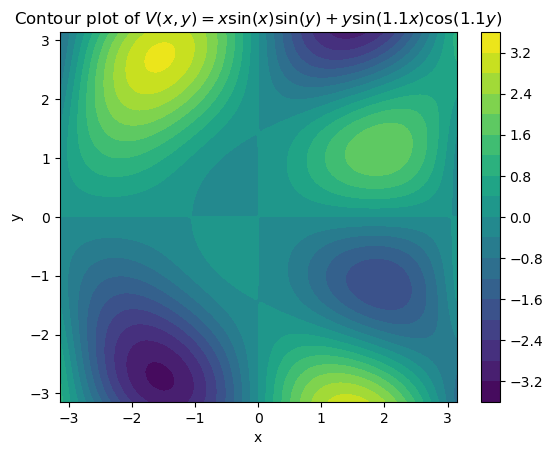

In [219]:
def V(vector):
    x, y = vector
    return x * np.sin(x) * np.sin(y) + y * np.sin(1.1 * x) * np.cos(1.1 * y)

# Create a grid of x and y values
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X, Y = np.meshgrid(x, y)

Z = np.array([[V([X[i,j], Y[i,j]]) for j in range(X.shape[1])] for i in range(X.shape[0])])

plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()  # Add a colorbar

plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Contour plot of $V(x, y) = x \sin(x) \sin(y) + y \sin(1.1x) \cos(1.1y)$')

plt.show()

we can see in this graph that the minimum seems to be around -1.5, -2.75 so I am going to choose those two numbers as my initial x and y.

In [235]:
minimized = multivar_adaptive_steps(V, [-1.5, -2.75], 10**-6, 10**-6, 10**-4, 1.1, .5)
print(minimized)

[-1.55688695 -2.71997889]


## *  Fitting to a Mystery Data Set

```
```

<font color = blue>
    
Previously, we used the function `curve_fit` from the `scipy.optimize` module to fit data to a curve.  Now, we want to create our own version of this function (that uses our minimizer code), and use it to analyze a mystery data set.

### Our Own Fitting Function

<font color = blue>
    
Create your own fitting function.  It should take as inputs "the data" (an array of x-values and an array of y-values), "the function" you want to fit to, and an array of initial guesses for parameters.  It should assume the function takes the form `function(x, parameters)`.  It should return an array of best-fit parameters, as well as the actual value of $\chi^2$ for these parameters.

Inside your function, you will want to define a simple function `chi_squared(parameters)`, which you can use your minimizer function on.

In a **discussion**, comment on any significant differences between your function and the `scipy.optimize` function you used before (based on just what you know: what its inputs and outputs are).  

In [333]:
def my_fitting_function(data, function, guesses):
    """
    data : an array of x values and an array of y values
    function : the function we are fitting to
    guesses : array of guesses for parameters

    returns : array of best-fit parameters with chi^2
    """
    ## Assuming data = [[x_i ... x_n], [y_i ... y_n]]
    def chi_squared(parameters):
        """
        function chi^2 that we want to minimize
        parameters : The parameters which we are doing our fit to minimize

        returns the value of chi_squared for the specific set of params
        """
        chi_squared = 0
        for i in range(len(data[0])): # make sure this isnt looping twice
            chi_squared += (data[1][i] - function(data[0][i], parameters))**2
        return chi_squared
    best_fit_params = multivar_adaptive_steps(chi_squared, guesses, 10**-6, 10**-6, 10**-4, 1.1, .5)
    chi_squared_value = chi_squared(best_fit_params)
    return best_fit_params, chi_squared_value

The main difference that I see between my function and sci py optimize is that I do not need to submit any guesses to what I believe the parameters will be. As I later talk about, I found that if I slightly misguessed my parameters for this csv data, that I would be left with completely horrible fitting data. This means that scipy most likely uses some sort of algorithm to guess the parameters on its own.

### Import and Visual Assessment of Data

<font color = blue>

Import the data file (stored on Nexus) "fittingdata.csv", and create a plot to display it.  Based on its appearance, choose a generic fitting function with one or more free parameters.  (Hint: make sure you have enough free parameters to account for everything you see).  Choose initial estimates for these parameters.

**Discuss** this analysis process and the choices you have made.

To do this, you may want to import the module `csv` and read documenation to establish how to use it.

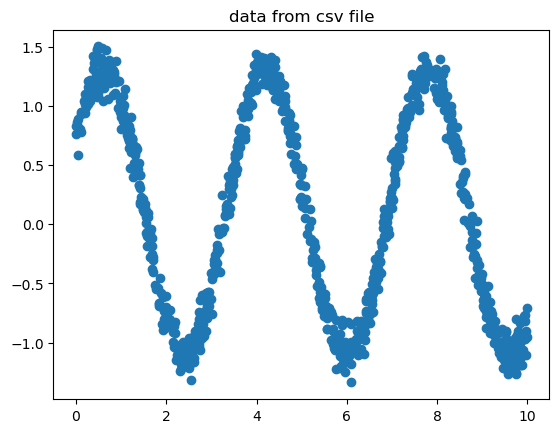

In [335]:
import csv

first_column = []
second_column = []

# Open the CSV file
with open('/Users/theosteiger/Phy 310/PHY 310 Fitting Data.csv', 'r') as file:
    reader = csv.reader(file)
    i = 0
    # Loop through the rows in the CSV
    for row in reader:
        # Append the first column's value to first_column list
        first_column.append(float(row[0]))
        # Append the second column's value to second_column list
        second_column.append(float(row[1]))

# Create the two-item list with both columns
csv_data = [first_column, second_column]
plt.title("data from csv file")
plt.scatter(csv_data[0], csv_data[1])


the function that I am choosing is going to be (Acos(Bx + C)) which has 3 parameters. To choose this function I thought about the wave that I saw in this plot and used my knowledge of the qualities of a wave to give free parameters for the amplitude, phase shift and period of the wave.

### Performing the Fit

<font color = blue>

Based on your previous assessment, create the function you will use with your fitting code, and then perform the fit (also using your choices of parameter estimates).

In [355]:
def fitting_function(x, parameters):
    """
    function that I am using in order to fit my data
    x : x axis variable
    parameters : a list of A, B and C each corresponding to a different quality of a wave
    
    returns : the y value based on parameters and x position
    """
    return parameters[0] * np.cos(parameters[1] * x + parameters[2])

my_fit = my_fitting_function(csv_data, fitting_function, [1.6, 2, 0])
print(my_fit)

(array([ 1.20404828,  1.74715481, -1.07209221]), 19.277876833712067)


### Assessing the Fit

#### Plotting the Fit Function

<font color = blue>
    
Plot your resulting fit function together with the data, and (as a **discussion**) assess the results.

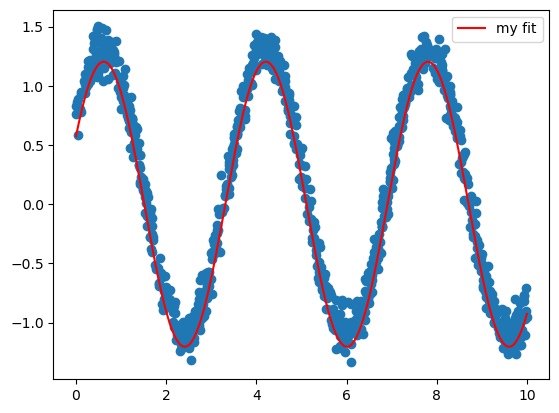

In [363]:
x = np.linspace(0, 10, 1000)
plt.scatter(csv_data[0], csv_data[1])
plt.plot(x, fitting_function(x, my_fit[0]), color="red", label="my fit")
plt.legend()

As we can see from the resulting graph, I ended up with fitting parameters that got me very close to the scatter plot that we found from the csv file. In terms of results, I noticed that the value of chi^2 would not go below around 19 which I believe is due to the nature of the csv data and my original guessed parameters. I also found that upon my first guessed parameters I was outputted a totally different fit which leads me to believe that unless the guessed parameters are reasonable, the fit will be bad.

#### Residuals

<font color = blue>
    Next plot the residuals: for each data point, find the difference between the $y$-coordinate of the fit function and the data point.  (If there appears to be a pattern to the residuals, this usually means you missed something when you constructed your fit function, and may need to go back and try again.

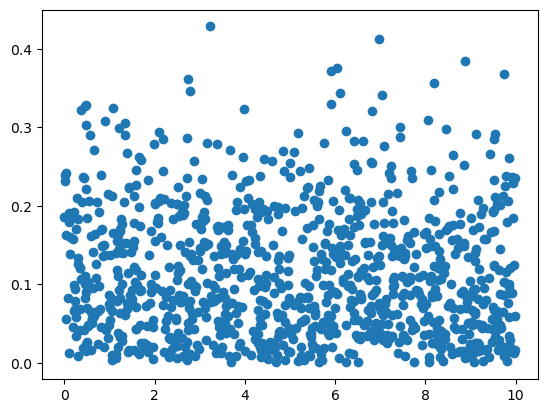

In [370]:
fit_error = np.zeros(len(csv_data[1]))

for i in range(len(csv_data[1])):
    fit_error[i] = abs(csv_data[1][i] - fitting_function(csv_data[0][i], my_fit[0]))

plt.scatter(csv_data[0], fit_error)

#### Estimating Uncertainty

<font color = blue>

Then, find
    $$
    \tilde{\sigma} = \sqrt{\frac{\chi^2}{N}}
    $$
evaluated at your fitting parameters.  This provides an estimate for the amount of (assumed to be random!) uncertainty in each individual data point y-value.

In [378]:
uncertainty = np.sqrt(abs(my_fit[1]/len(csv_data[1])))
print(round(uncertainty, 4))

0.13884479404612932


# Any Other Problem

```
```

<font color = blue>
    
Come up with a physics problem (different from the ones analyzed above) that you can use either a Monte Carlo method or minimization to solve.  Write up a description of the problem below, and then apply the numerical technique to solve it.  Present your results graphically, and discuss their signficance. 

The problem that I am going to solve is a challenging integral from my physics 220 class. Analytically I found that the result was = sqrt(2)/5 however it took me a long time to figure this out. I am going to solve it using the monte carlo method some number of times and then take the average (could use my fit but its tedious) of the values I get to confirm my answer of sqrt(2)/5. This integral came up when solving for the constant in a linear combination of wavefunctions. When solving for the constant, you can check whether you found the correct value of the constant by evaluating the integral of the total wave times the complex conjugate of the part of the wave whos constant it is.

In [391]:
def integrand(x):
    """
    integrand for this integral that respresents some wave (psi(x)) times the complex conjugate of some part of that wave (psi_1(x))
    x : position
    """
    L = 2
    return np.sqrt(2/L) * np.sin(np.pi * x / L) * (np.sqrt(8/(5 * L)) * np.sin(np.pi * x / L) + (np.sqrt(2/(5 * L)) * np.sin(2 * np.pi * x/L)))

def compute_integral():
    """
    computes this challenging integral by taking the average of the monte carlo method answer over 10 iterations
    returns : the rounded answer to the integral
    """
    avg = 0
    for i in range(10):
        avg += monte_carlo(integrand, 0, 2, 100000, 3) # L = 2 so xf = 2
    return avg/10

In [399]:
print(round(compute_integral(), 3))
print(round(2/np.sqrt(5), 3))

0.894
0.894


As we can see in the results when rounded to the neared thousandth, the two results are identical. I think that this problem is especially interesting because while completing this, I was actually struggling to understand if I was wrong or right based off of my answer. Luckily, with the help of this little numerical method, I can confidently assert that I either set the problem up wrong, or got the correct answer which is somewhat comforting to me.